In [61]:
from init import Core, Normalize

# Config
minRadius = 15
maxRadius = 30
searchRadius = 50

-3


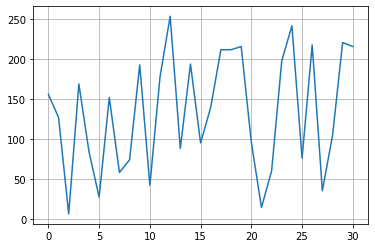

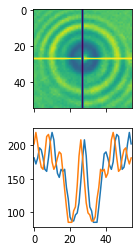

Duration:  0.6124186515808105


In [92]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
from IPython.display import clear_output
import time, math
from hough import HoughCircles
from scipy import signal

# Get a rough position
Core.snap_image()
img = Normalize(Core.get_image())
circles = HoughCircles(img, minRadius, maxRadius)
c = circles[0]

Core.start_continuous_sequence_acquisition(17)
time.sleep(1)
start = time.time()
for i in range(1):
    img = Normalize(Core.get_last_image())
    region = img[math.floor(c[1]-searchRadius):math.ceil(c[1]+searchRadius), math.floor(c[0]-searchRadius):math.ceil(c[0]+searchRadius)]
    circles = HoughCircles(region, minRadius, maxRadius)
    if (len(circles) == 0):
        print("Lost circles")
        break
    c[0] = circles[0][0] + math.floor(c[0]-searchRadius)
    c[1] = circles[0][1] + math.floor(c[1]-searchRadius)
    r = circles[0][2]*1.2
    xarr = img[math.floor(c[1]), math.floor(c[0]-r):math.ceil(c[0]+r)]
    co = signal.correlate(xarr, np.flip(xarr), mode="same")
    l = math.floor(len(co)/2)
    print(np.argmax(co[l-15:l+16])-15)
    plt.plot(co[l-15:l+16])
    plt.grid()
    plt.show()
    fig, axs = plt.subplots(2, sharex=True)
    axs[1].plot(xarr)
    axs[1].plot(np.flip(xarr))
    img[math.floor(c[1]), math.floor(c[0]-r):math.ceil(c[0]+r)] = 255
    img[math.floor(c[1]-r):math.ceil(c[1]+r), math.floor(c[0])] = 0
    axs[0].imshow(img[math.floor(c[1]-r):math.ceil(c[1]+r), math.floor(c[0]-r):math.ceil(c[0]+r)])    
    asp = np.diff(axs[1].get_xlim())[0] / np.diff(axs[1].get_ylim())[0]
    axs[1].set_aspect(asp)
    plt.show()
Core.stop_sequence_acquisition()
print("Duration: ", time.time() - start)